In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from datetime import datetime, date 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.inspection import permutation_importance


#Logistic regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc,precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,KFold
from sklearn.pipeline import make_pipeline

import sklearn
import sklearn.linear_model
import sklearn.tree
import sklearn.ensemble 
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.pipeline import make_pipeline

import statsmodels.api as sm

In [2]:
df = pd.read_csv('df_rf_filled.csv')

In [15]:
df['Time'] = pd.to_datetime(df['Time'], format = '%Y/%m/%d %H:%M:%S')

In [16]:
df

,Time,riverflow,CSOspills,cso15,cso18
0,2003-01-01 00:00:00,1.195,0.0,0.0,0.0
1,2003-01-01 00:15:00,1.240,0.0,0.0,0.0
2,2003-01-01 00:30:00,1.195,0.0,0.0,0.0
3,2003-01-01 00:45:00,1.195,0.0,0.0,0.0
4,2003-01-01 01:00:00,1.195,0.0,0.0,0.0
...,...,...,...,...,...
350725,2013-01-01 09:15:00,4.673,0.0,0.0,0.0
350726,2013-01-01 09:30:00,4.643,0.0,0.0,0.0
350727,2013-01-01 09:45:00,4.619,0.0,0.0,0.0
350728,2013-01-01 10:00:00,4.607,0.0,0.0,0.0


In [28]:
df_hr = df.set_index('Time').resample('1h').mean()

In [29]:
df_hr

,riverflow,CSOspills,cso15,cso18
Time,,,,
2003-01-01 00:00:00,1.20625,0.0,0.0,0.0
2003-01-01 01:00:00,1.19500,0.0,0.0,0.0
2003-01-01 02:00:00,1.19500,0.0,0.0,0.0
2003-01-01 03:00:00,1.20625,0.0,0.0,0.0
2003-01-01 04:00:00,1.21750,0.0,0.0,0.0
...,...,...,...,...
2013-01-01 06:00:00,4.79675,0.0,0.0,0.0
2013-01-01 07:00:00,4.73300,0.0,0.0,0.0
2013-01-01 08:00:00,4.71050,0.0,0.0,0.0


In [96]:
df_cso = pd.read_csv('df_cso.csv')

In [97]:
df_cso

,cso15,cso18,CSOspills,Riverflow,Time
0,0.0,0.0,0.0,0.0,2003-01-01 07:00:00
1,0.0,0.0,0.0,0.0,2003-01-01 08:00:00
2,0.0,0.0,0.0,0.0,2003-01-01 09:00:00
3,0.0,0.0,0.0,0.0,2003-01-01 10:00:00
4,0.0,0.0,0.0,0.0,2003-01-01 11:00:00
...,...,...,...,...,...
57466,0.0,0.0,0.0,0.0,2013-01-01 06:15:00
57467,0.0,0.0,0.0,0.0,2013-01-01 07:15:00
57468,0.0,0.0,0.0,0.0,2013-01-01 08:15:00
57469,0.0,0.0,0.0,0.0,2013-01-01 09:15:00


In [99]:
df_cso["Time"] = pd.to_datetime(df_cso['Time'], format = '%Y/%m/%d %H:%M:%S')

In [100]:
df_cso = df_cso.drop(['Riverflow'],axis=1)

In [101]:
df_cso

,cso15,cso18,CSOspills,Time
0,0.0,0.0,0.0,2003-01-01 07:00:00
1,0.0,0.0,0.0,2003-01-01 08:00:00
2,0.0,0.0,0.0,2003-01-01 09:00:00
3,0.0,0.0,0.0,2003-01-01 10:00:00
4,0.0,0.0,0.0,2003-01-01 11:00:00
...,...,...,...,...
57466,0.0,0.0,0.0,2013-01-01 06:15:00
57467,0.0,0.0,0.0,2013-01-01 07:15:00
57468,0.0,0.0,0.0,2013-01-01 08:15:00
57469,0.0,0.0,0.0,2013-01-01 09:15:00


In [102]:
df_cso_hr = df_cso.set_index('Time').resample('1h').mean()

In [112]:
df_cso_hr_clear = df_cso_hr_clear.fillna(0)

In [115]:
df_cso_hr_clear = df_cso_hr_clear.drop(df_cso_hr_clear[df_cso_hr_clear['CSOspills']==0].index)

In [116]:
df_cso_hr_clear

,cso15,cso18,CSOspills
Time,,,
2003-01-01 23:00:00,0.00000,1.38450,1.38450
2003-01-08 09:00:00,0.00000,0.30000,0.30000
2003-01-08 22:00:00,2.78340,6.73200,9.51540
2003-01-08 23:00:00,21.69450,7.99140,29.68590
2003-01-15 15:00:00,207.95565,123.87630,331.83195
...,...,...,...
2012-12-27 08:00:00,0.00000,4.27050,4.27050
2012-12-28 04:00:00,36.47940,24.36495,60.84435
2012-12-28 05:00:00,45.49170,42.47925,87.97095


In [124]:
for i in range(len(df_hr["cso15"])):
    for k in range(len(df_cso_hr_clear["cso15"])):
        if df_hr.index[i] == df_cso_hr_clear.index[k]:
            df_hr['CSOspills'][i] = df_cso_hr_clear['CSOspills'][k]
            df_hr['cso15'][i] = df_cso_hr_clear['cso15'][k]
            df_hr['cso18'][i] = df_cso_hr_clear['cso18'][k]

df_hr

,riverflow,CSOspills,cso15,cso18
Time,,,,
2003-01-01 00:00:00,1.20625,0.0,0.0,0.0
2003-01-01 01:00:00,1.19500,0.0,0.0,0.0
2003-01-01 02:00:00,1.19500,0.0,0.0,0.0
2003-01-01 03:00:00,1.20625,0.0,0.0,0.0
2003-01-01 04:00:00,1.21750,0.0,0.0,0.0
...,...,...,...,...
2013-01-01 06:00:00,4.79675,0.0,0.0,0.0
2013-01-01 07:00:00,4.73300,0.0,0.0,0.0
2013-01-01 08:00:00,4.71050,0.0,0.0,0.0


In [10]:
df_hr_clear = df_hr.drop(df_hr[df_hr['CSOspills']==0].index)

In [11]:
df_hr_clear

,riverflow,CSOspills,cso15,cso18
23,2.55550,1.38450,0.00000,1.38450
177,1.00600,0.30000,0.00000,0.30000
190,1.17850,9.51540,2.78340,6.73200
191,1.26250,29.68590,21.69450,7.99140
351,2.28425,331.83195,207.95565,123.87630
...,...,...,...,...
87560,9.42325,4.27050,0.00000,4.27050
87580,3.56125,60.84435,36.47940,24.36495
87581,3.35200,87.97095,45.49170,42.47925
87638,4.93500,27.07350,19.24155,7.83195


In [127]:
#df_hr.to_csv('df_hr.csv',index=False)

In [38]:
df_hr = pd.read_csv('df_hr.csv')

In [39]:
df_hr

,riverflow,CSOspills,cso15,cso18
0,1.20625,0.0,0.0,0.0
1,1.19500,0.0,0.0,0.0
2,1.19500,0.0,0.0,0.0
3,1.20625,0.0,0.0,0.0
4,1.21750,0.0,0.0,0.0
...,...,...,...,...
87678,4.79675,0.0,0.0,0.0
87679,4.73300,0.0,0.0,0.0
87680,4.71050,0.0,0.0,0.0
87681,4.65350,0.0,0.0,0.0


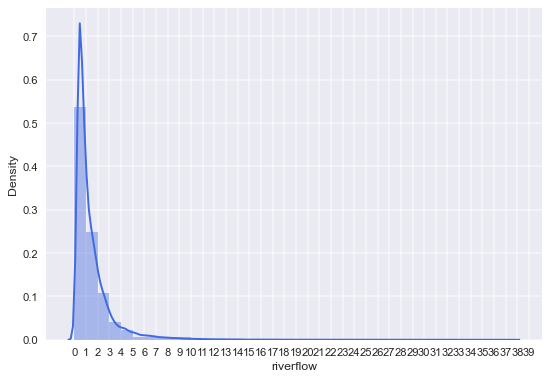

In [43]:
plt.style.use('seaborn')
plt.grid(linestyle="-", alpha=0.5,linewidth=1.5) 


bins=[0,1,2,3,4,5,10,15,20,25,30,35]
sns.distplot(df_hr['riverflow'], bins,hist=True,kde=True,color='royalblue')
plt.xticks(range(0, 40)[::1] ,fontsize=10)
plt.show()

In [12]:
df_hr_clear

,riverflow,CSOspills,cso15,cso18
23,2.55550,1.38450,0.00000,1.38450
177,1.00600,0.30000,0.00000,0.30000
190,1.17850,9.51540,2.78340,6.73200
191,1.26250,29.68590,21.69450,7.99140
351,2.28425,331.83195,207.95565,123.87630
...,...,...,...,...
87560,9.42325,4.27050,0.00000,4.27050
87580,3.56125,60.84435,36.47940,24.36495
87581,3.35200,87.97095,45.49170,42.47925
87638,4.93500,27.07350,19.24155,7.83195


In [13]:
y = df_hr_clear['riverflow']
X = df_hr_clear.drop(['riverflow'],axis=1)

<AxesSubplot:xlabel='CSOspills', ylabel='riverflow'>

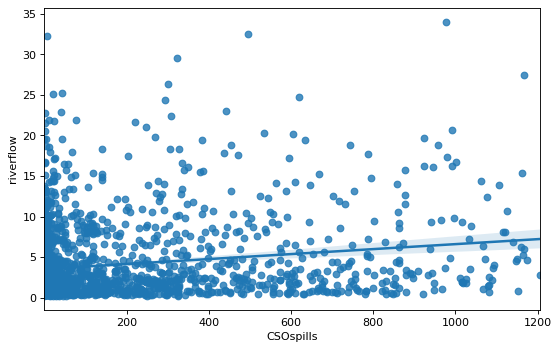

In [14]:
sns.regplot(x='CSOspills', y='riverflow',data=df_hr_clear)

In [15]:
model_1 = sm.OLS(y, X)
result = model_1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              riverflow   R-squared (uncentered):                   0.274
Model:                            OLS   Adj. R-squared (uncentered):              0.273
Method:                 Least Squares   F-statistic:                              313.0
Date:                Mon, 05 Jul 2021   Prob (F-statistic):                   4.95e-116
Time:                        10:56:46   Log-Likelihood:                         -5134.3
No. Observations:                1659   AIC:                                  1.027e+04
Df Residuals:                    1657   BIC:                                  1.028e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CSOspills      0.0114      0.001     18.360      0.000       0.010       0.013
cso15         -0.0294      0.003     -8.506      0.000      -0.036      -0.023
cso18          0.0407      0.004     10.151      0.000       0.033       0.049
==============================================================================
Omnibus:                      411.219   Durbin-Watson:                   0.534
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1315.874
Skew:                           1.224   Prob(JB):                    1.83e-286
Kurtosis:                       6.611   Cond. No.                     1.02e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.68e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [16]:
X = X.drop(['CSOspills'],axis=1)

In [17]:
model_2 = sm.OLS(y, X)
result = model_2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              riverflow   R-squared (uncentered):                   0.274
Model:                            OLS   Adj. R-squared (uncentered):              0.273
Method:                 Least Squares   F-statistic:                              313.0
Date:                Mon, 05 Jul 2021   Prob (F-statistic):                   4.95e-116
Time:                        10:56:53   Log-Likelihood:                         -5134.3
No. Observations:                1659   AIC:                                  1.027e+04
Df Residuals:                    1657   BIC:                                  1.028e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cso15         -0.0180      0.003     -6.174      0.000      -0.024      -0.012
cso18          0.0521      0.005     11.356      0.000       0.043       0.061
==============================================================================
Omnibus:                      411.219   Durbin-Watson:                   0.534
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1315.874
Skew:                           1.224   Prob(JB):                    1.83e-286
Kurtosis:                       6.611   Cond. No.                         9.94
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
y_fitted = result.fittedvalues

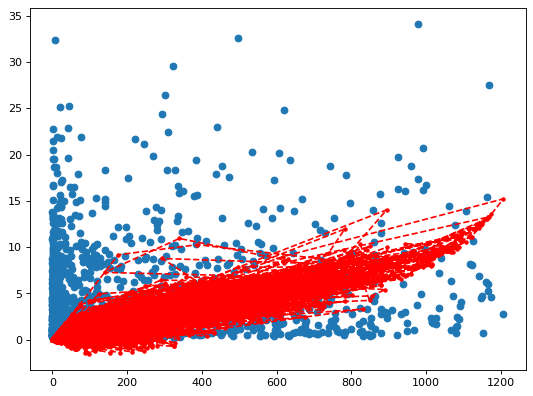

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(df_hr_clear['CSOspills'], y, 'o', label='data')
ax.plot(df_hr_clear['CSOspills'], y_fitted, 'r--.',label='OLS')

(900.0, 1100.0, 0.0, 30.0)

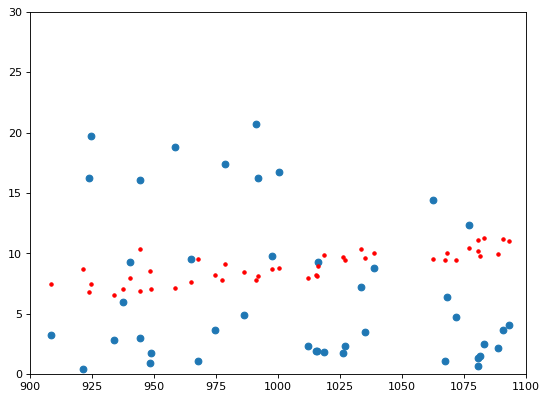

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(df_hr_clear['CSOspills'], y, 'o', label='data')
ax.plot(df_hr_clear['CSOspills'], y_fitted, 'r.',label='OLS')
ax.axis((900, 1100, 0, 30))

In [21]:
minist = min(df_hr_clear.riverflow)
minist

0.18725000000000006

In [33]:
def river_pred(x):
    blank = []
    a = []
    maximum = []
    minimum = []
    mid_rf = 0
    upper_bound = x + 0.05
    lower_bound = x - 0.05
    for i in df_hr_clear['CSOspills']:
        if i > upper_bound or i < lower_bound:
            lower_bound = lower_bound - 0.05
            upper_bound = upper_bound + 0.05
        else:
            a = df_hr_clear[(df_hr_clear.CSOspills==i)]['riverflow'].tolist()
            for k in a:
                blank.append(float(k))
    maximum = np.array(max(blank))
    minimum = np.array(min(blank))
    c18_max = max(df_hr_clear[(df_hr_clear.riverflow==float(maximum))]['cso18'].tolist())
    c15_max = max(df_hr_clear[(df_hr_clear.riverflow==float(maximum))&(df_hr_clear.cso18==c18_max)]['cso15'].tolist())
    c18_min = min(df_hr_clear[(df_hr_clear.riverflow==float(minimum))]['cso18'].tolist())
    c15_min = min(df_hr_clear[(df_hr_clear.riverflow==float(minimum))&(df_hr_clear.cso18==c18_min)]['cso15'].tolist())
    max_val = round(float(result.predict([c15_max,c18_max])),4)
    min_rf = result.predict([c15_min,c18_min])
    min_rf = np.float(min_rf)
    min_val = round(max(minist,min_rf),4)
    maxi = max(max_val,min_val)
    mini = min(max_val,min_val)
    print('The predict range of river-flow within 15 minutes  is from ',mini,'m2/s to ',maxi,'m2/s')
    if x > 700:
        print('WARNING: Expecting Tide')
        if maximum > 15:
            print('WARNING: High Probability to reach Warning Level, history peak data:',maximum,'m2/s')
    #blank = np.array(blank)
    #mid_rf = round(np.median(blank),4)
    #print('The predict range of river-flow within 15 minutes is from ',min_val,' to ',mid_rf)

In [23]:
river_pred(2.5)

The predict range of river-flow within 15 minutes  is from  0.3082 m2/s to  0.3575 m2/s


In [24]:
river_pred(0.4123)

The predict range of river-flow within 15 minutes  is from  0.1873 m2/s to  0.3575 m2/s


In [25]:
river_pred(207.1)

The predict range of river-flow within 15 minutes  is from  2.5643 m2/s to  4.4737 m2/s


In [26]:
river_pred(10.2)

The predict range of river-flow within 15 minutes  is from  0.3082 m2/s to  0.3575 m2/s


In [27]:
river_pred(349)

The predict range of river-flow within 15 minutes  is from  4.5401 m2/s to  4.5482 m2/s


In [29]:
river_pred(5)

The predict range of river-flow within 15 minutes  is from  0.3082 m2/s to  0.3575 m2/s


In [30]:
river_pred(100)

The predict range of river-flow within 15 minutes  is from  2.0283 m2/s to  2.2641 m2/s


In [37]:
river_pred(1000)

The predict range of river-flow within 15 minutes  is from  7.8345 m2/s to  8.5501 m2/s
